In [1]:
from utils import *
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = import_dataset('train.csv')

In [3]:
visualise_dataset(dataframe=df, label_col_name='label')

AssertionError: label column contains non integer values, use 'stats_df' to investigate

In [4]:
stats_df(df)

Columns with non numeric entries are:
label
Values occurencies for these columns:
label
1.0     3421
7.0     3138
3.0     3018
0.0     3012
2.0     2996
9.0     2996
6.0     2919
8.0     2901
4.0     2876
5.0     2717
NaN        4
99.0       2
Name: label, dtype: int64


In [5]:
# The best method in this situation is drop
df = clean_df(df, method='drop')
stats_df(df)

No bad columns


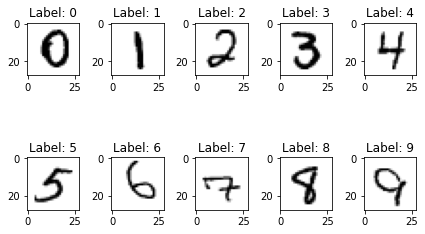

In [6]:
visualise_dataset(dataframe=df, label_col_name='label')

In [7]:
X, y = preprocess(df,subset=10000)

In [8]:
X_train, X_test, y_train, y_test = split_train_test(X, y)

In [9]:
net = define_network([196, 8, 8, 10])

In [10]:
# Here it's where they should get creative
net, loss_values, val_score = train(net, (X_train,X_test), (y_train, y_test), n_splits=1, num_epochs=10,
                                    batch_size=2048, lr=0.001)

100%|████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.80it/s]


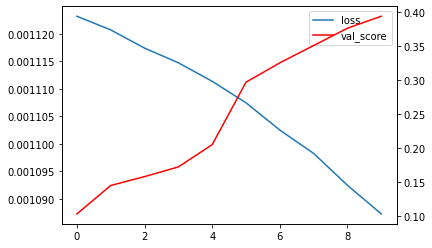

In [11]:
plot_stats_training(loss_values, val_score)

In [12]:
X_pub_test = import_dataset('test_public_X.csv')

In [13]:
X_test = preprocess(X_pub_test,train=False)

In [14]:
out_test = forward_test(net,X_test)

In [15]:
# If current time is HH:MM, then PW is: HH+MM+1. Here probably you do not need +2 bc on kaggle we
# have to take in account that they use GMT
evaluate_public_test(out_test)

Insert password46
Accuracy is: 0.39085458537409223


In [16]:
generate_submission(net)

Insert file name (submission_grp<grp_nr>.csv)submission_grp2.csv


At this point, we show the partecipants that data does not fall from the sky, but it's hard work to get it


Insert file name: test_im_in.jpeg


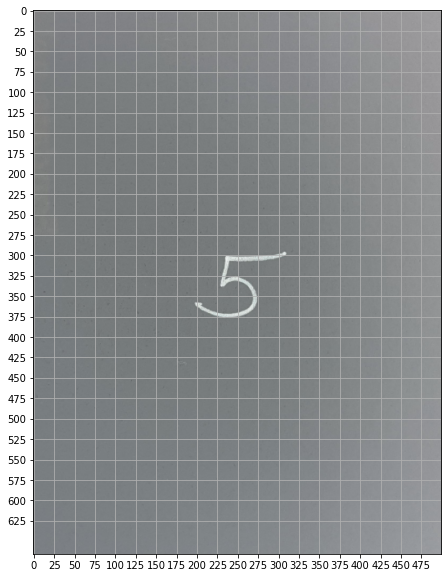

In [17]:
img = import_img()
show_img(img)

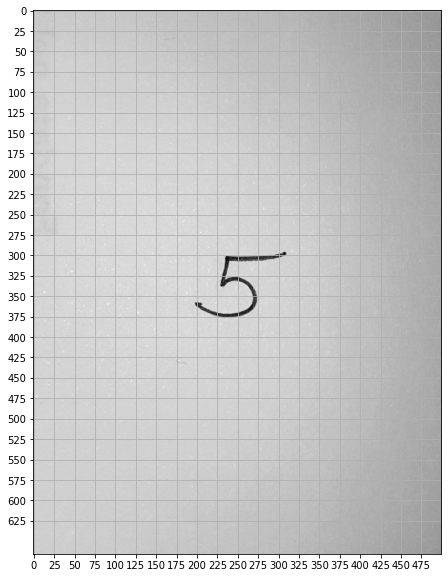

In [18]:
img = to_bw(img)
show_img(img)

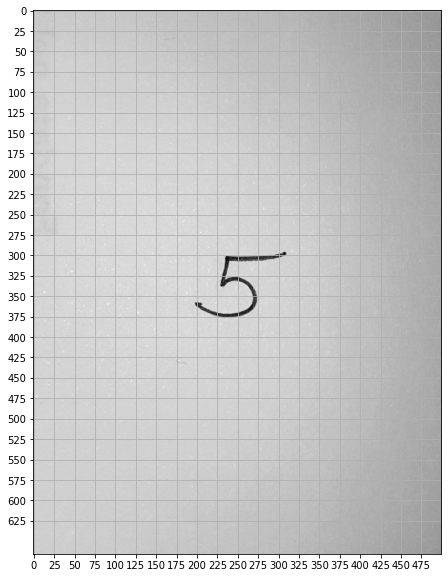

Input top left corner coordinates (e.g.: x,y): 175,275
Input bottom right corner coordinates (e.g.: x,y): 325,400


In [19]:
img = cut_img(img)

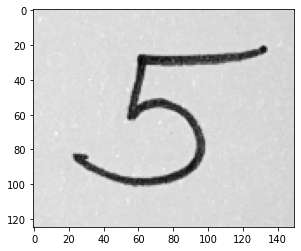

Ok? If yes: y; if no insert trashhold (n: 1< n < 255): 70


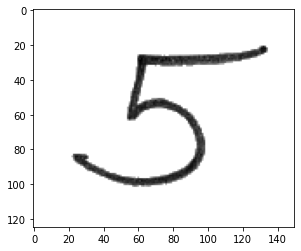

Ok? If yes: y; if no insert trashhold: y


In [20]:
img = erase_bg(img)

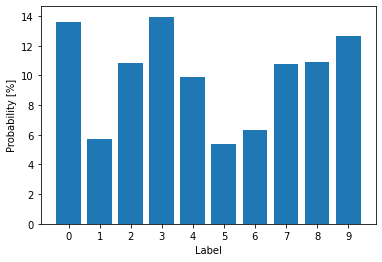

Predicted label is: 3


In [21]:
single_image(net,img)